In [1]:
# Standard import
import numpy as np
import matplotlib.pyplot as plt

# Random number generator
from numpy.random import default_rng
rng = default_rng()
rand = rng.random

# Import binomial coefficient function
from scipy.special import binom

We need to create an array whose values are the edges of "binomial probability bins".

In [2]:
# Size of the problem and base probability
M = 10
xi = 0.5

# Array of all possible outcomes
k = np.arange(M+1)

# Array of probabilities, created with array math
Pk = binom(M,k) * xi**k * (1-xi)**(M-k)

# Bin locations for simulation.  First entry needs to be zero.
bins = np.zeros(M+2)
bins[1:] = Pk.cumsum()

We now have an array that can be used to simulate draws from a binomial distribution, even though our random number generator draws from the uniform distribution.  We just have to histogram the draws from the uniform distribution using our unequally spaced bins.

Text(0, 0.5, 'Location')

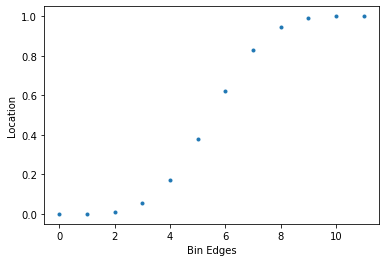

In [3]:
plt.plot(bins, '.')
plt.xlabel("Bin Edges")
plt.ylabel("Location")

In [15]:
N = 1000
data = rand(N)
counts, bins = np.histogram(data,bins=bins)

The histogram we just produced uses uneven bins.

(array([  1.,   8.,  50., 128., 200., 257., 200., 104.,  42.,   8.,   2.]),
 array([0.00000000e+00, 9.76562500e-04, 1.07421875e-02, 5.46875000e-02,
        1.71875000e-01, 3.76953125e-01, 6.23046875e-01, 8.28125000e-01,
        9.45312500e-01, 9.89257812e-01, 9.99023438e-01, 1.00000000e+00]),
 <BarContainer object of 11 artists>)

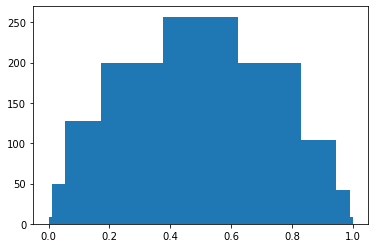

In [5]:
plt.hist(data, bins=bins)

If we use the original array of values, we see something close to the expected distribution.

<BarContainer object of 11 artists>

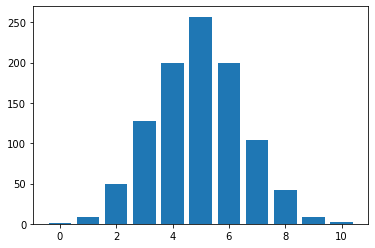

In [6]:
plt.bar(k,counts)

We can embed all of this in a function that will generate the histogram.

In [7]:
def simulate_binomial(M,xi,N):
    """
    Generate a data sample from the binomial distribution.
    
    M = number of events in a single trial
    xi = probability of success
    N = number of trials to simulate
    
    Plots a histogram and returns counts and bins.
    """
    
    k = np.arange(M+1)

    # Array of probabilities, created with array math
    Pk = binom(M,k) * xi**k * (1-xi)**(M-k)

    # Bin locations for simulation.  First entry needs to be zero.
    bins = np.zeros(M+2)
    bins[1:] = Pk.cumsum()
    
    # Generate the data set.
    data = rand(N)
    counts, *rest = np.histogram(data,bins=bins)
    
    # Plot a histogram of the results.
    plt.bar(k, counts)
    plt.xlabel("# of Successes")
    plt.ylabel("Frequency")
    
    # Return bins and counts for further analysis.
    return k, counts

Now we can use the function for numerical experiments.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 array([ 2,  7, 19, 25, 20, 11, 12,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0]))

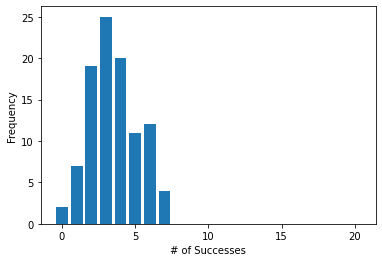

In [8]:
simulate_binomial(20,0.2,100)